In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cabo san lucas mx
takoradi gh
iqaluit ca
dali cn
ponta do sol cv
shu kz
butaritari ki
tiksi ru
yellowknife ca
ambon id
saskylakh ru
nyurba ru
grande prairie ca
puerto ayora ec
hermanus za
ruatoria nz
urumqi cn
bethel us
vao nc
rikitea pf
bluff nz
nantucket us
arman ru
jamestown sh
busselton au
busselton au
kapaa us
namanga ke
bredasdorp za
barrow us
dikson ru
walvis bay na
punta arenas cl
saint-philippe re
esperance au
bambous virieux mu
thompson ca
castro cl
puerto ayora ec
taolanaro mg
punta arenas cl
palabuhanratu id
hilo us
mayo ca
bluff nz
port elizabeth za
sandwick gb
barrow us
albany au
ushuaia ar
gladstone au
vaini to
mahebourg mu
barrow us
belushya guba ru
hofn is
tual id
riyadh sa
ushuaia ar
vao nc
bitam ga
hithadhoo mv
mataura pf
kavaratti in
isiro cd
tiarei pf
ushuaia ar
tsihombe mg
busselton au
lebu cl
lodja cd
george town ky
ushuaia ar
bredasdorp za
nishihara jp
barranca pe
kruisfontein za
beidao cn
sentyabrskiy ru
victor harbor au
rikitea pf
mataura pf
saveh ir
punta are

ushuaia ar
umzimvubu za
punta arenas cl
victoria sc
east london za
nizhneyansk ru
astoria us
ambilobe mg
sirjan ir
ushuaia ar
hirara jp
san andres co
kaitangata nz
hilo us
lompoc us
saint-georges gf
cape town za
mitu co
qasigiannguit gl
butaritari ki
lorengau pg
kuching my
busselton au
kaeo nz
belushya guba ru
fare pf
khatanga ru
illoqqortoormiut gl
rikitea pf
butaritari ki
khatanga ru
tateyama jp
punta arenas cl
cape town za
hobart au
okakarara na
trelew ar
taolanaro mg
bainbridge us
ponta do sol cv
busselton au
mataura pf
mataura pf
hilo us
srednekolymsk ru
arraial do cabo br
nybro se
atuona pf
serro br
rikitea pf
hilo us
luderitz na
vila velha br
port alfred za
barrow us
rocha uy
lompoc us
palabuhanratu id
bengkulu id
khatanga ru
mahebourg mu
atuona pf
alice springs au
busselton au
hobart au
kaitangata nz
alofi nu
puerto ayora ec
atuona pf
leticia co
new norfolk au
haibowan cn
rikitea pf
barrow us
taoudenni ml
khatanga ru
nemuro jp
college us
shimoda jp
port alfred za
snezhnogorsk r

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [41]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [42]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"

In [12]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [15]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":501,"main":"Rain","description":"moderate rain","icon":"10d"}],"base":"stations","main":{"temp":46.67,"feels_like":44.29,"temp_min":44.29,"temp_max":48.58,"pressure":1020,"humidity":94},"visibility":10000,"wind":{"speed":5.01,"deg":38,"gust":20},"rain":{"1h":2.18},"clouds":{"all":100},"dt":1622307120,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1622279498,"sunset":1622333525},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [16]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 46.67,
  'feels_like': 44.29,
  'temp_min': 44.29,
  'temp_max': 48.58,
  'pressure': 1020,
  'humidity': 94},
 'visibility': 10000,
 'wind': {'speed': 5.01, 'deg': 38, 'gust': 20},
 'rain': {'1h': 2.18},
 'clouds': {'all': 100},
 'dt': 1622307120,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1622279498,
  'sunset': 1622333525},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [18]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [19]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 46.67,
  'feels_like': 44.29,
  'temp_min': 44.29,
  'temp_max': 48.58,
  'pressure': 1020,
  'humidity': 94},
 'visibility': 10000,
 'wind': {'speed': 5.01, 'deg': 38, 'gust': 20},
 'rain': {'1h': 2.18},
 'clouds': {'all': 100},
 'dt': 1622307120,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1622279498,
  'sunset': 1622333525},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [20]:
# Get the JSON data.
boston_data = city_weather.json()

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 48.58 94 100 5.01


In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d% %H:%M:%S')

'2021-05-29 16:52:00'

In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [33]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cabo san lucas
Processing Record 2 of Set 1 | takoradi
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | dali
Processing Record 5 of Set 1 | ponta do sol
Processing Record 6 of Set 1 | shu
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | ambon
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | nyurba
Processing Record 13 of Set 1 | grande prairie
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 17 of Set 1 | urumqi
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | vao
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 | nantucket
Processing Record 23 of

Processing Record 38 of Set 4 | amapa
Processing Record 39 of Set 4 | heyang
Processing Record 40 of Set 4 | sao gabriel da cachoeira
Processing Record 41 of Set 4 | mount gambier
Processing Record 42 of Set 4 | miedzyrzec podlaski
Processing Record 43 of Set 4 | labuhan
Processing Record 44 of Set 4 | hamilton
Processing Record 45 of Set 4 | saint-georges
Processing Record 46 of Set 4 | broome
Processing Record 47 of Set 4 | copiapo
Processing Record 48 of Set 4 | kahului
Processing Record 49 of Set 4 | moindou
Processing Record 50 of Set 4 | gamba
Processing Record 1 of Set 5 | fort nelson
Processing Record 2 of Set 5 | alofi
Processing Record 3 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 5 | launceston
Processing Record 5 of Set 5 | clyde river
Processing Record 6 of Set 5 | steamboat springs
Processing Record 7 of Set 5 | salmon creek
Processing Record 8 of Set 5 | ranghulu
Processing Record 9 of Set 5 | touros
Processing Record 10 of Set 5 | san i

Processing Record 26 of Set 8 | adrar
Processing Record 27 of Set 8 | bayog
Processing Record 28 of Set 8 | dukat
Processing Record 29 of Set 8 | tezu
Processing Record 30 of Set 8 | poum
Processing Record 31 of Set 8 | yerbogachen
Processing Record 32 of Set 8 | huanren
Processing Record 33 of Set 8 | pedernales
Processing Record 34 of Set 8 | batemans bay
Processing Record 35 of Set 8 | sitka
Processing Record 36 of Set 8 | hammerfest
Processing Record 37 of Set 8 | praya
Processing Record 38 of Set 8 | the valley
Processing Record 39 of Set 8 | cooma
Processing Record 40 of Set 8 | san felipe
Processing Record 41 of Set 8 | campo maior
Processing Record 42 of Set 8 | vagamo
Processing Record 43 of Set 8 | zykovo
Processing Record 44 of Set 8 | najran
Processing Record 45 of Set 8 | martigues
Processing Record 46 of Set 8 | tsentralnyy
City not found. Skipping...
Processing Record 47 of Set 8 | talovaya
Processing Record 48 of Set 8 | xiuyan
Processing Record 49 of Set 8 | necochea
P

Processing Record 18 of Set 12 | sangar
Processing Record 19 of Set 12 | craig
Processing Record 20 of Set 12 | doctor juan leon mallorquin
Processing Record 21 of Set 12 | luang prabang
Processing Record 22 of Set 12 | lata
Processing Record 23 of Set 12 | gizo
Processing Record 24 of Set 12 | izberbash
Processing Record 25 of Set 12 | kadykchan
City not found. Skipping...
Processing Record 26 of Set 12 | road town
Processing Record 27 of Set 12 | melilla
Processing Record 28 of Set 12 | bucerias
Processing Record 29 of Set 12 | charters towers
Processing Record 30 of Set 12 | ilhabela
Processing Record 31 of Set 12 | iracoubo
Processing Record 32 of Set 12 | matara
Processing Record 33 of Set 12 | dakar
Processing Record 34 of Set 12 | serrai
City not found. Skipping...
Processing Record 35 of Set 12 | havre
Processing Record 36 of Set 12 | medicine hat
Processing Record 37 of Set 12 | juba
Processing Record 38 of Set 12 | cockburn town
Processing Record 39 of Set 12 | north bend
Pro

In [35]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cabo San Lucas,22.8909,-109.9124,95.81,54,40,3.44,MX,2021-05-29 17:12:46
1,Takoradi,4.8845,-1.7554,82.35,77,99,8.46,GH,2021-05-29 17:12:46
2,Iqaluit,63.7506,-68.5145,36.05,58,32,18.43,CA,2021-05-29 17:12:46
3,Dali,25.7000,100.1833,66.09,75,44,5.88,CN,2021-05-29 17:15:49
4,Ponta Do Sol,32.6667,-17.1000,73.13,63,38,4.72,PT,2021-05-29 17:15:49
5,Shu,43.5983,73.7614,74.70,43,21,9.69,KZ,2021-05-29 17:15:49
6,Butaritari,3.0707,172.7902,82.33,81,100,15.86,KI,2021-05-29 17:15:50
7,Tiksi,71.6872,128.8694,29.80,98,93,8.05,RU,2021-05-29 17:12:04
8,Yellowknife,62.4560,-114.3525,52.32,52,37,1.99,CA,2021-05-29 17:13:04
9,Ambon,-3.6954,128.1814,80.24,81,99,8.93,ID,2021-05-29 17:12:49


In [37]:
# Create new column order for city_data_df
new_column_order = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed', ]

In [38]:
# Reorder columns for city_data_df
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cabo San Lucas,40,MX,2021-05-29 17:12:46,54,22.8909,-109.9124,95.81,3.44
1,Takoradi,99,GH,2021-05-29 17:12:46,77,4.8845,-1.7554,82.35,8.46
2,Iqaluit,32,CA,2021-05-29 17:12:46,58,63.7506,-68.5145,36.05,18.43
3,Dali,44,CN,2021-05-29 17:15:49,75,25.7000,100.1833,66.09,5.88
4,Ponta Do Sol,38,PT,2021-05-29 17:15:49,63,32.6667,-17.1000,73.13,4.72
...,...,...,...,...,...,...,...,...,...
550,Jiayuguan,36,CN,2021-05-29 17:15:47,28,39.8167,98.3000,67.71,4.59
551,Padang,100,ID,2021-05-29 17:11:21,76,-0.9492,100.3543,78.44,3.87
552,Grindavik,90,IS,2021-05-29 17:13:55,81,63.8424,-22.4338,48.67,28.95
553,Chebsara,100,RU,2021-05-29 17:15:48,58,59.2002,38.8356,49.33,10.49


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

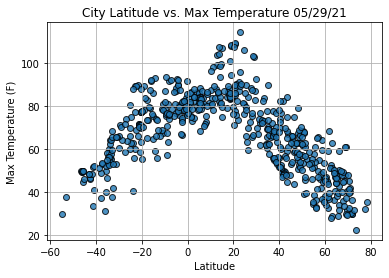

In [53]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

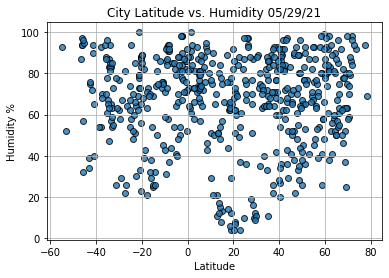

In [62]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

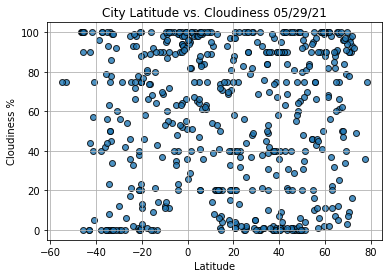

In [61]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

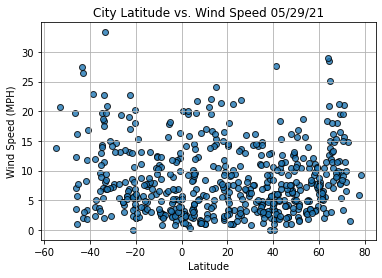

In [60]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [78]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    print(f"r_value = {r_value}")
    plt.show()

In [79]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

r_value = -0.8320212567489335


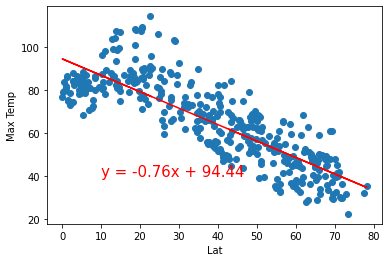

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

r_value = 0.7827641704289181


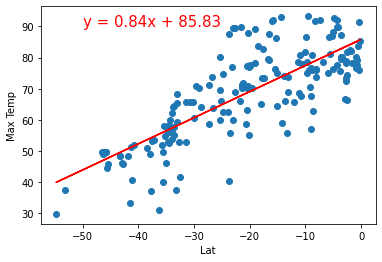

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


r_value = 0.0883959633995716


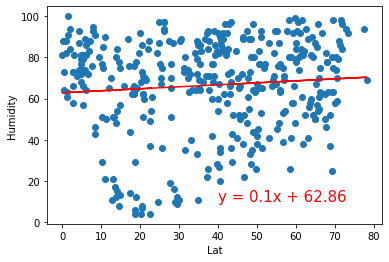

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


r_value = 0.03798383915356469


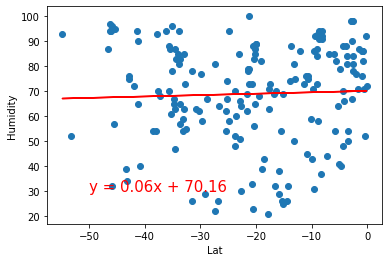

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

r_value = 0.02011475977906295


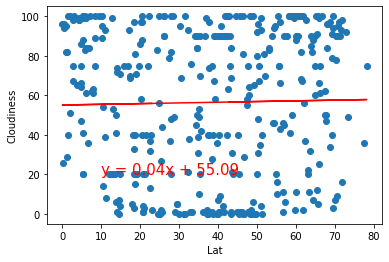

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,20))

r_value = 0.164754074946225


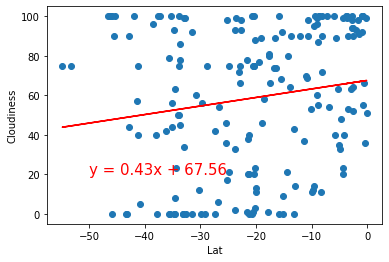

In [101]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,20))

r_value = 0.12402691307595483


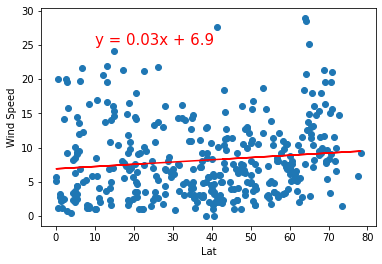

In [100]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,25))

r_value = -0.3171021794877595


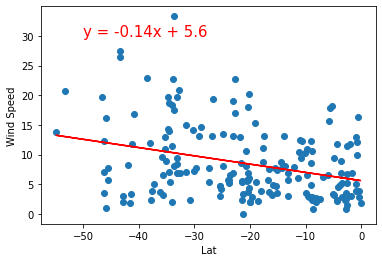

In [103]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))